# DSCI100 Group 5 Project Proposal
Group Members: Chengyuan Yao, Eunji Hwang, Lina Anwari, Duffy Du
# Title: 
# Table of Contents:
1. Introduction
2. Preliminary exploratory data analysis
3. Methods
4. Expected outcomes and significance


# 1.0 Introduction

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 1.1 trestbpsData set variable descriptions:
1. #3 (age) - age in years
2. #4 (sex) - sex (1 = male; 0 = female)
3. #9 (cp) - chest pain type
	-- Value 1: typical angina
	-- Value 2: atypical angina
	-- Value 3: non-anginal pain
	-- Value 4: asymptomatic
4. #10 (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) - serum cholestoral in mg/dl
6. #16 (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg) - restecg: resting electrocardiographic results
	-- Value 0: normal
	-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
	-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach) - maximum heart rate achieved
9. #38 (exang) - exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak) - ST depression induced by exercise relative to rest
11. #41 (slope) - the slope of the peak exercise ST segment
	-- Value 1: upsloping
	-- Value 2: flat
	-- Value 3: downsloping
12. #44 (ca) - number of major vessels (0-3) colored by flourosopy
13. #51 (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute) - num: diagnosis of heart disease (angiographic disease status)
	-- Value 0: < 50% diameter narrowing
	-- Value 1: > 50% diameter narrowing
    
Note about num:
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)



Numerical: 
- age
- trestbps
- chol
- thalach
- oldpeak

Categorical:
- sex
- cp - chest pain type
- fbs
- restecg
- exang
- slope
- ca
- thal
- num

Predicted attribute:
- num --> tranformed to diagnosis (0 = no diagnosis , 1 = diagnosis present (including values of 1, 2, 3, 4))

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.0 Preliminary Exploratory Data Analysis

In [27]:
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
install.packages("expss")
library(expss)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.1 Reading and Checking data





In [28]:
cleveland_data <- read_csv("data/processed.cleveland.data", 
                           col_names = c("age", 
                                         "sex", 
                                         "cp", 
                                         "trestbps", 
                                         "chol", 
                                         "fbs", 
                                         "restercg", 
                                         "thalach", 
                                         "exang", 
                                         "oldpeak", 
                                         "slope", 
                                         "ca", 
                                         "thal", 
                                         "num"))
cleveland_data$num <- as.factor(cleveland_data$num)
head(cleveland_data)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restercg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,sex,cp,trestbps,chol,fbs,restercg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [30]:
# see if there is other number rather than 0-4 in the num column
cleveland_data  %>%
    select(num)  %>% 
    unlist() %>% 
    levels()


[1] "0" "1" "2" "3" "4"

In [31]:
# transform num from 0-4 to 0 or 1 (1, 2, 3, 4) and store into diagnosis variable

cleveland_data <- cleveland_data %>%
                  mutate(diagnosis = dplyr::recode(num, '0' = '0', .default = '1'))

head(cleveland_data)

age,sex,cp,trestbps,chol,fbs,restercg,thalach,exang,oldpeak,slope,ca,thal,num,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0


As the result we get correct data in the diagnosiscolumn

In [32]:
# to see how the original data distribute
cleveland_data %>% 
    group_by(diagnosis) %>%
    summarize(n = n())


`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n
<fct>,<int>
0,164
1,139


# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.2 Tidy the data

In [35]:
# We select all the numerical columns and diagnosis column
cleveland_data2 <- cleveland_data%>%
select(age,trestbps,chol,thalach,oldpeak,diagnosis)
head(cleveland_data2)

age,trestbps,chol,thalach,oldpeak,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,0
67,160,286,108,1.5,1
67,120,229,129,2.6,1
37,130,250,187,3.5,0
41,130,204,172,1.4,0
56,120,236,178,0.8,0


In [36]:
#split the data into trainning and testing
set.seed(2344) 
cleveland_data_split<- initial_split(cleveland_data2, prop = 0.75, strata = diagnosis)  
cleveland_data_train<- training(cleveland_data_split)   
cleveland_data_test<- testing(cleveland_data_split)

In [37]:
# Summary statistics (max, min, mean, median and SD) of numerical variables
summary_data <-cleveland_data_train %>%
                apply_labels(age= "age",
                            trestbps = "trestbps",
                            chol = "chol",
                            thalach = "thalach",
                            oldpeak = "oldpeak")
                             
summary_table <- summary_data %>%
                 tab_cells(age, trestbps, chol, thalach, oldpeak) %>%
                 tab_cols(total(label = "Summary Statistics"))  %>%
                 tab_stat_fun(Max = w_max, Min = w_min, Mean = w_mean, "Median" = w_median, "Standand Deviation " = w_sd, method = list) %>%
                tab_pivot()
summary_table

|          | Summary Statistics |     |       |        |                     |
 |          |                Max | Min |  Mean | Median | Standand Deviation  |
 | -------- | ------------------ | --- | ----- | ------ | ------------------- |
 |      age |               77.0 |  29 |  54.3 |   55.0 |                 9.2 |
 | trestbps |              192.0 |  94 | 132.0 |  130.0 |                17.4 |
 |     chol |              564.0 | 131 | 247.1 |  240.0 |                52.8 |
 |  thalach |              202.0 |  71 | 149.8 |  154.0 |                23.5 |
 |  oldpeak |                5.6 |   0 |   1.0 |    0.6 |                 1.1 |

#  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3 Graphs of Relationships

#  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.1 age vs. trestbps (color = diagnosis)

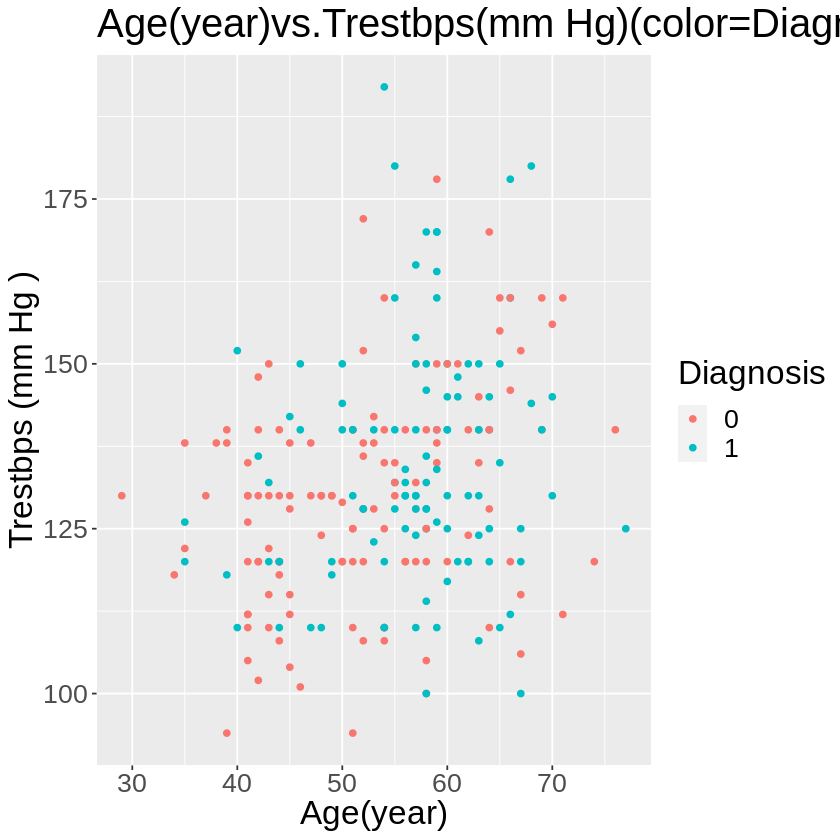

In [38]:
age_and_trestbps_plot <- ggplot(cleveland_data_train, aes(x = age, y = trestbps, color= diagnosis)) + 
    geom_point() +
    xlab("Age(year)") +
    ylab("Trestbps (mm Hg )") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age(year)vs.Trestbps(mm Hg)(color=Diagnosis)")
age_and_trestbps_plot

#  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.2 age vs. chol (color = diagnosis)

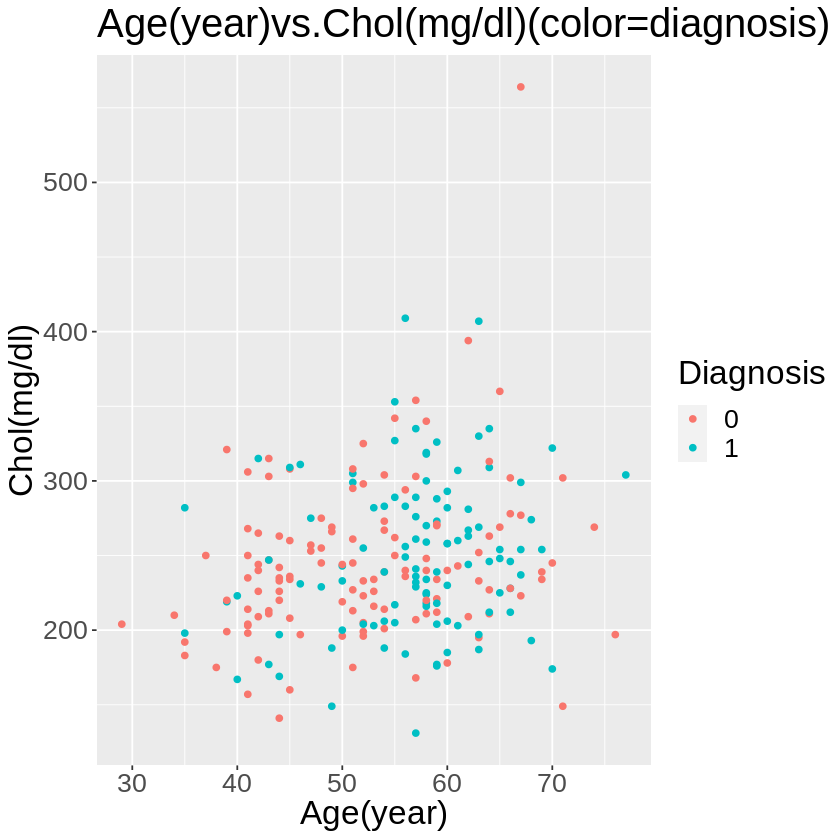

In [39]:
age_and_chol_plot <- ggplot(cleveland_data_train, aes(x = age, y = chol, color= diagnosis)) + 
    geom_point() +
    xlab("Age(year)") +
    ylab("Chol(mg/dl)") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age(year)vs.Chol(mg/dl)(color=diagnosis)")
age_and_chol_plot

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.3 age vs. thalach (color = diagnosis)

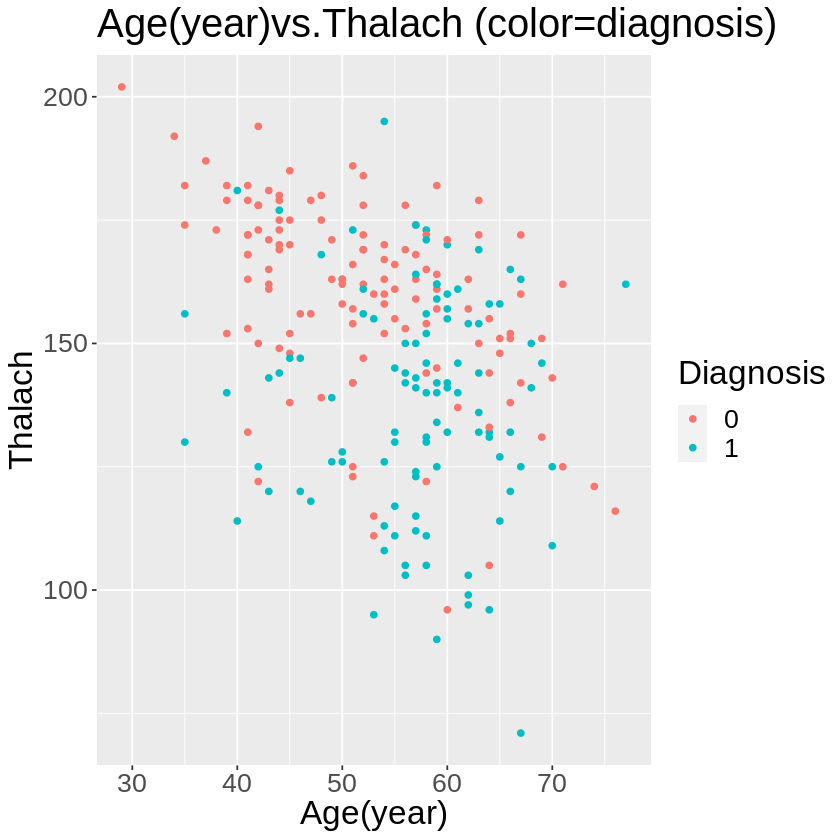

In [40]:
age_and_thalach_plot <- ggplot(cleveland_data_train, aes(x = age, y =  thalach , color= diagnosis)) + 
    geom_point() +
    xlab("Age(year)") +
    ylab("Thalach") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age(year)vs.Thalach (color=diagnosis)")
age_and_thalach_plot

#  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.4 age vs. oldpeak  (color = diagnosis)

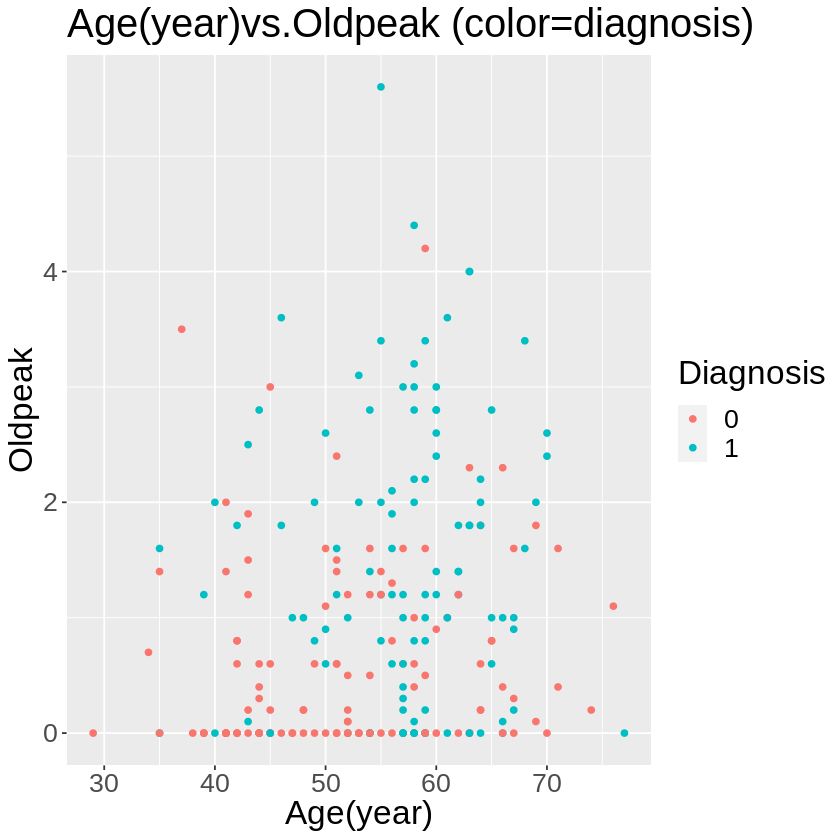

In [41]:
age_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = age, y =  oldpeak, color= diagnosis)) + 
    geom_point() +
    xlab("Age(year)") +
    ylab("Oldpeak") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Age(year)vs.Oldpeak (color=diagnosis)")
age_and_oldpeak_plot

#  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.5 trestbps vs. chol (color = diagnosis)

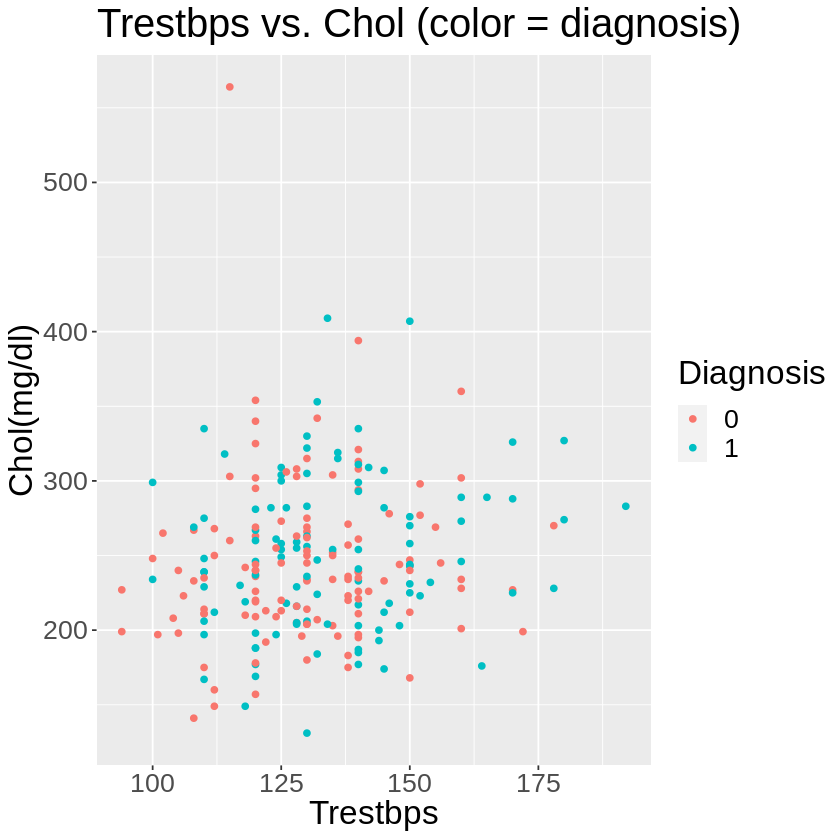

In [42]:
trestbps_and_chol_plot <- ggplot(cleveland_data_train, aes(x = trestbps, y = chol, color= diagnosis)) + 
    geom_point() +
    xlab("Trestbps") +
    ylab("Chol(mg/dl)") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Trestbps vs. Chol (color = diagnosis)")
trestbps_and_chol_plot

#  <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.6 trestbps vs. thalach (color = diagnosis)

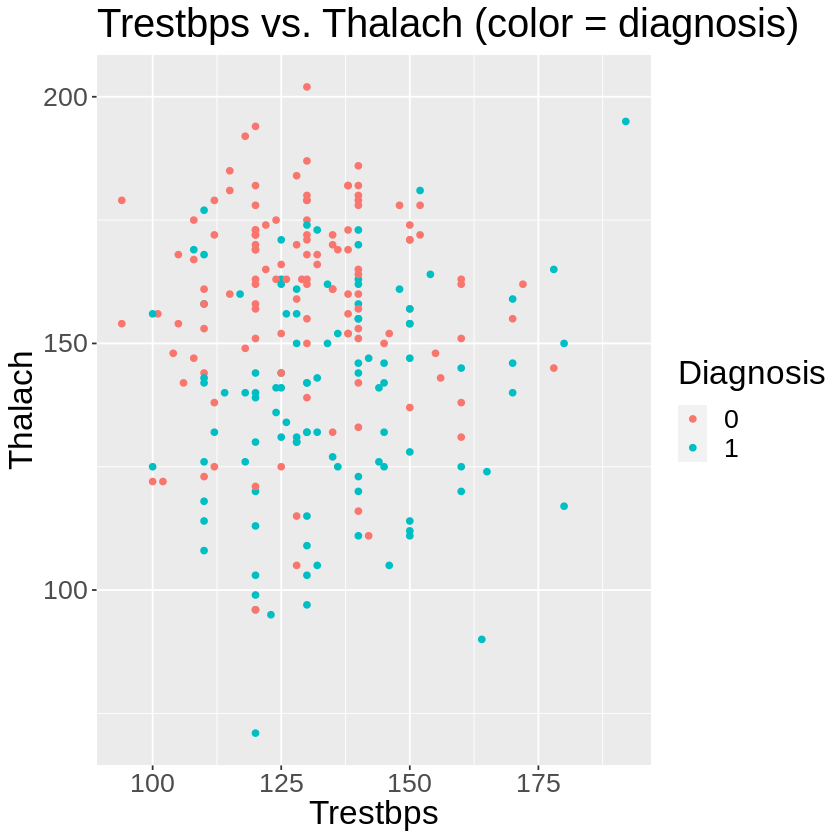

In [43]:
trestbps_and_thalach_plot <- ggplot(cleveland_data_train, aes(x = trestbps, y = thalach, color= diagnosis)) + 
    geom_point() +
    xlab("Trestbps") +
    ylab("Thalach") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Trestbps vs. Thalach (color = diagnosis)")
trestbps_and_thalach_plot

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.7 trestbps vs. oldpeak (color = diagnosis)

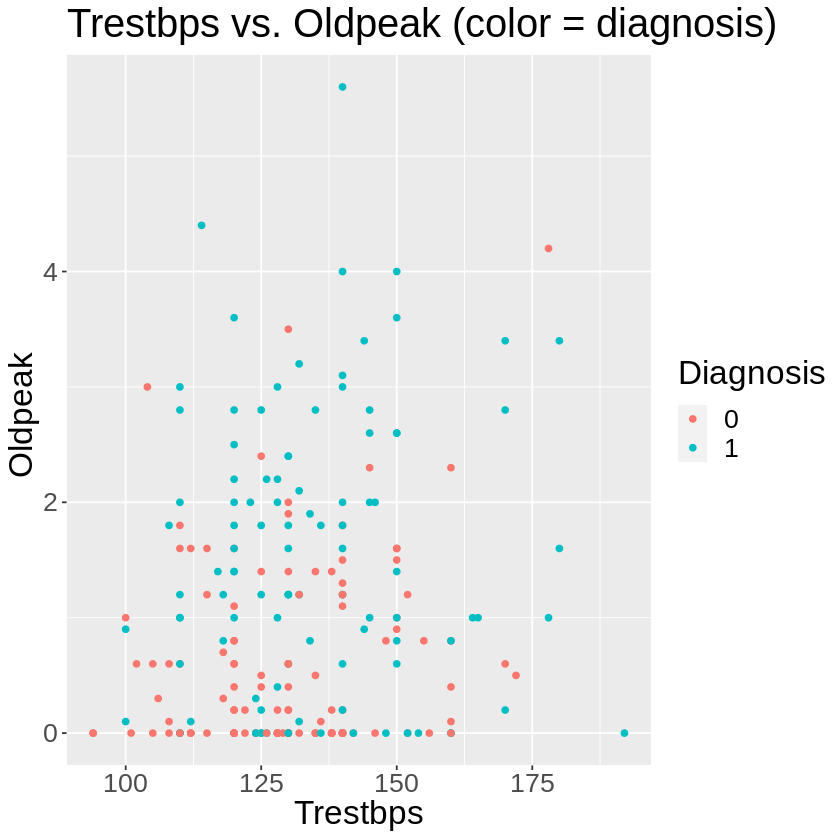

In [44]:
trestbps_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = trestbps, y = oldpeak, color= diagnosis)) + 
    geom_point() +
    xlab("Trestbps") +
    ylab("Oldpeak ") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Trestbps vs. Oldpeak (color = diagnosis)")
trestbps_and_oldpeak_plot

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.8 chol vs. thalach (color = diagnosis)

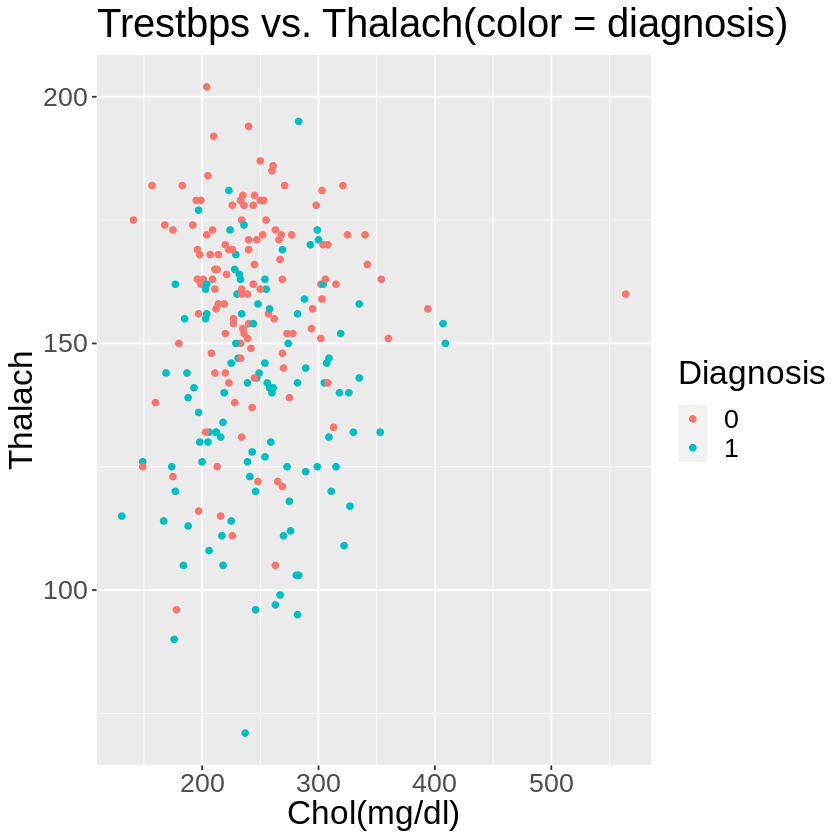

In [45]:
chol_and_thalach_plot <- ggplot(cleveland_data_train, aes(x = chol, y = thalach, color= diagnosis)) + 
    geom_point() +
    xlab("Chol(mg/dl)") +
    ylab("Thalach") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Trestbps vs. Thalach(color = diagnosis)")
chol_and_thalach_plot

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.9 chol vs. oldpeak (color = diagnosis)

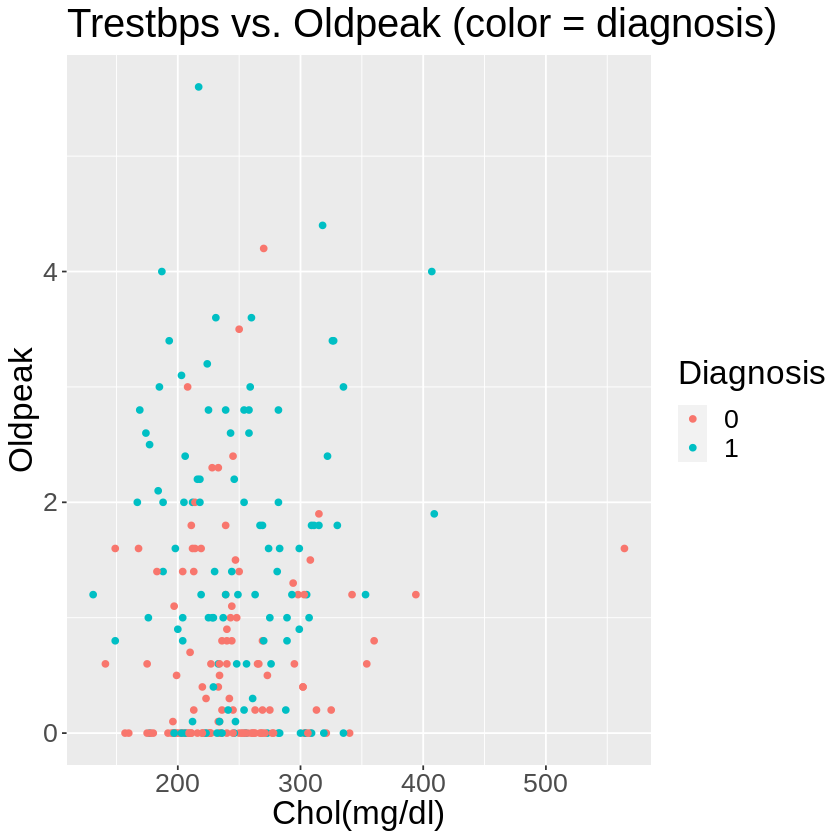

In [46]:
chol_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = chol, y = oldpeak, color= diagnosis)) + 
    geom_point() +
    xlab("Chol(mg/dl)") +
    ylab("Oldpeak") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Trestbps vs. Oldpeak (color = diagnosis)")
chol_and_oldpeak_plot

# <img  src="https://oercommons.s3.amazonaws.com/media/courseware/lesson/image/Human-heart-clipart-5.jpg" width="30"/> 2.3.10 thalach vs. oldpeak (color = diagnosis)

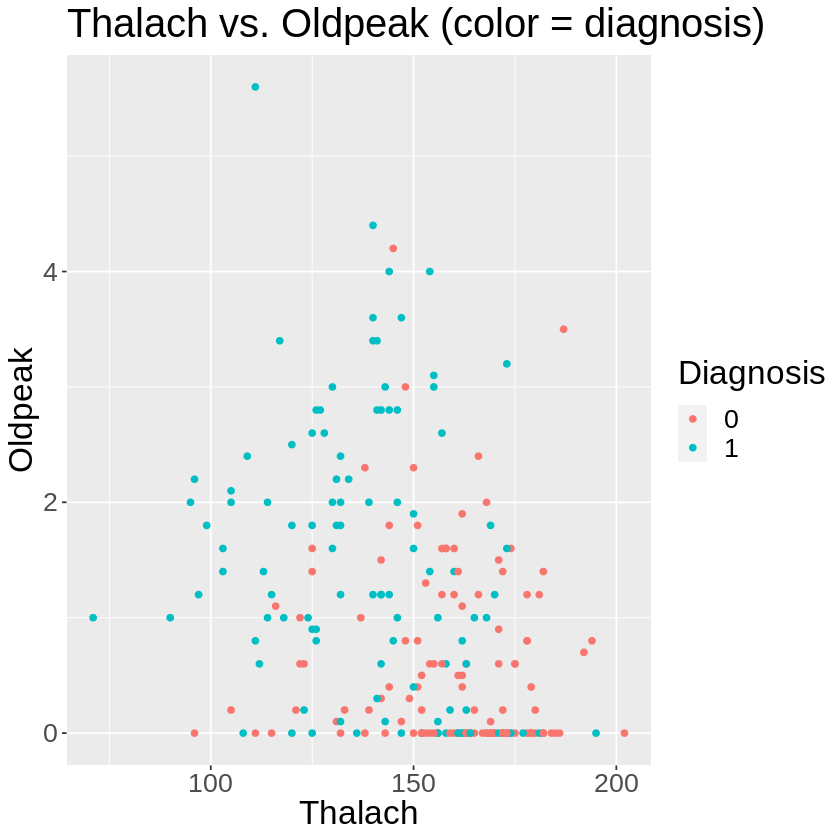

In [47]:
thalach_and_oldpeak_plot <- ggplot(cleveland_data_train, aes(x = thalach, y = oldpeak, color= diagnosis)) + 
    geom_point() +
    xlab("Thalach") +
    ylab("Oldpeak") +
    labs(color = "Diagnosis") +
    theme(text = element_text(size = 20))+
    ggtitle("Thalach vs. Oldpeak (color = diagnosis)")
thalach_and_oldpeak_plot

Graphs of the following:
age vs. trestbps (color = diagnosis)

age vs. chol (color = diagnosis)

age vs. thalach (color = diagnosis)

age vs. oldpeak  (color = diagnosis)

trestbps vs. chol  (color = diagnosis)

trestbps vs. thalach  (color = diagnosis)

trestbps vs. oldpeak  (color = diagnosis)

chol vs. thalach  (color = diagnosis)

chol vs. oldpeak (color = diagnosis)

thalach vs. oldpeak  (color = diagnosis)

# 3.0 Methods

# 4.0 Expected outcomes and significance